LINEAR REGRESSION CODE

X shape: (5,)
y shape: (5,)
X shape: (5, 1)
y shape: (5, 1)
Intercept (theta0): 1.6081789115873428
Slope (theta1): 0.7808297621241052
R² Score: 0.4822


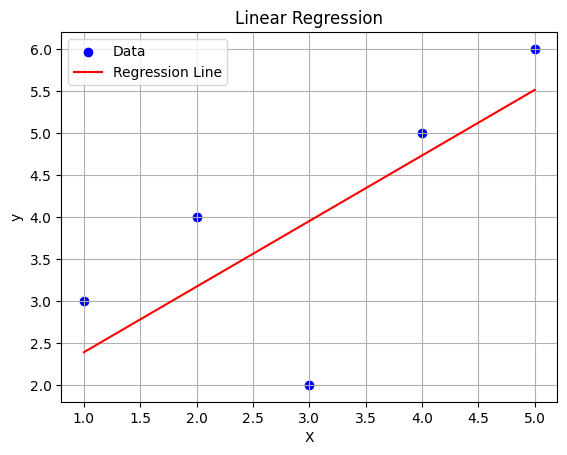

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])

# print("X shape:", X.shape)
# print("y shape:", y.shape)

# Reshape X to a 2D array (m, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# print("X shape:", X.shape)
# print("y shape:", y.shape) 

# Add bias term (intercept) by adding a column of 1s to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (m, 2)

# Hyperparameters
alpha = 0.01       # Learning rate
iterations = 1000  # Number of iterations

# Initialize weights (theta0 for intercept, theta1 for slope)
theta = np.zeros((2, 1))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Train the model
theta_final, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Print the final parameters
print(f"Intercept (theta0): {theta_final[0][0]}")
print(f"Slope (theta1): {theta_final[1][0]}")

# Predict
y_pred = X_b.dot(theta_final)

# R² score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print(f"R² Score: {r2_score(y, y_pred):.4f}")

# Plot
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
